<a href="https://colab.research.google.com/github/ShaimaM/Intro_to_ML/blob/main/W1_D4_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 

df = pd.read_csv('https://github.com/gumdropsteve/datasets/raw/master/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,target
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.shape

(150, 6)

**Categorical Features**

In [6]:
df.species.unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df.species.str.split(expand=True)[0]


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: 0, Length: 150, dtype: object

In [8]:
df.species.str.split(expand=True)[0].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
d = [{'species':v} for v in df.species]
d

[{'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'se

In [10]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `species` column
data = [{'species':v} for v in df.species]

t = vec.fit_transform(data)
names = vec.feature_names_

sp=pd.DataFrame(t, columns=names)


In [11]:
vec.feature_names_

['species=setosa', 'species=versicolor', 'species=virginica']

In [12]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<150x3 sparse matrix of type '<class 'numpy.int64'>'
	with 150 stored elements in Compressed Sparse Row format>

**Text Features**


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(df.species)
X

<150x3 sparse matrix of type '<class 'numpy.int64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [14]:
# put the data inside data frame to show it 
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(df.species)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
target          0
dtype: int64

## **Imputation of Missing Titanic Dataset**

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_python/main/day_09/data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
C22 C26        3
              ..
D37            1
D19            1
E46            1
D9             1
B19            1
Name: Cabin, Length: 147, dtype: int64

In [20]:
df.Age.mean()

29.69911764705882

**Imputation of Missing Data**

In [21]:
#t = pd.DataFrame(df)

df=df.fillna(df.mean())

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:

# replacing na values in Cabin with No Cabin 
df["Cabin"].fillna("No Cabin", inplace = True) 
  
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,No Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,No Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [25]:
df["Embarked"].fillna("No Embarked", inplace = True) 
  
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,No Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,No Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Derived Features**



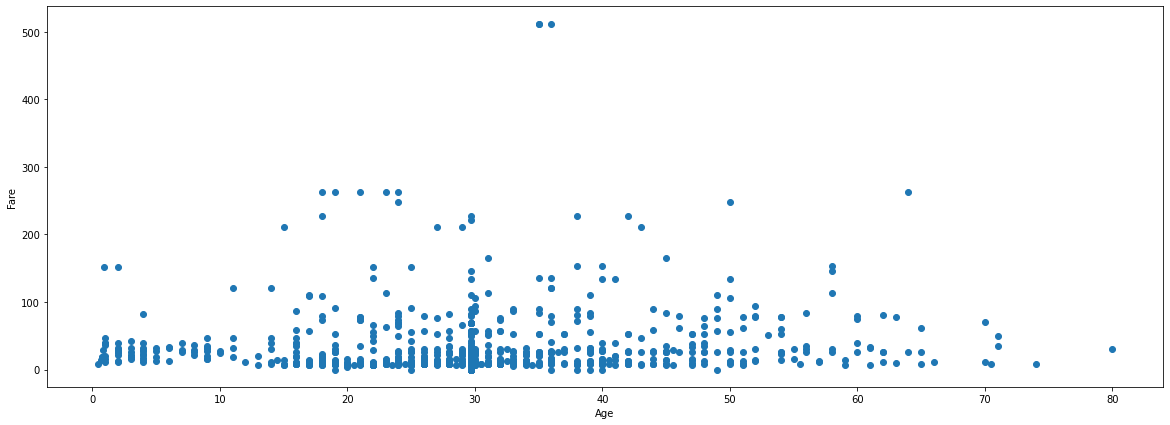

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = df.Age
y = df.Fare
plt.figure(figsize=(20,7))
plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Fare");